In [85]:
from typing import Tuple

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas import Series

data = pd.read_csv(f'../data/student_mental_health.csv')

In [86]:
len(data.axes[1])

11

In [87]:
MAX_NOMINAL_VALUES = 100
GLOBAL_MISSING = []

In [88]:
#def read_column(column: Series):


In [89]:
from typing import Any


def analyse_column_distribution(column: Series, column_name: str, missing_values: dict) -> tuple[
    Series, bool, int, bool]:
    missing_value_number = column.isna().sum()

    print(f'missing values : "{missing_value_number}"')
    print("next")
    if column_name in missing_values:
        line_to_drop = column[column == missing_values[column_name]].index
        print(f'{len(line_to_drop)} lines dropped.')
        column = column.drop(line_to_drop, inplace=True)

    histo: dict = column.value_counts().to_dict()

    quanti: bool = False
    is_nominal: bool = len(histo) < MAX_NOMINAL_VALUES
    if column.dtype == float:
        quanti = True

    value_count = column.value_counts()

    print(f'histogram : {histo}')
    print(f'{len(value_count)} unique value')
    print(f'column dtype : {column.dtype}')
    print(f'is quantitative : {quanti}')
    print(f'is nominal: {is_nominal}')
    return column, quanti, len(value_count), is_nominal

In [91]:
#def handle_quantitative(column: Series):


In [92]:
analyse_column_distribution(data.iloc[:, 2], column_name="Age", missing_values={})

missing values : "1"
next
histogram : {18.0: 32, 24.0: 23, 19.0: 21, 23.0: 13, 20.0: 6, 21.0: 3, 22.0: 2}
7 unique value
column dtype : float64
is quantitative : True
is nominal: True


(0      18.0
 1      21.0
 2      19.0
 3      22.0
 4      23.0
        ... 
 96     21.0
 97     18.0
 98     19.0
 99     23.0
 100    20.0
 Name: Age, Length: 101, dtype: float64,
 True,
 7,
 True)

In [95]:
for column in data.columns.values:
    col, quanti, unique_val_count, is_nominal = analyse_column_distribution(data[column], column_name=data[column].name,
                                                                            missing_values={})


missing values : "0"
next
histogram : {'8/7/2020 12:39': 3, '8/7/2020 16:34': 2, '8/7/2020 14:43': 2, '8/7/2020 13:13': 2, '8/7/2020 14:57': 2, '8/7/2020 12:43': 2, '8/7/2020 15:14': 2, '8/7/2020 14:29': 2, '8/7/2020 18:11': 1, '8/7/2020 18:10': 1, '9/7/2020 18:24': 1, '9/7/2020 13:15': 1, '8/7/2020 16:53': 1, '9/7/2020 11:57': 1, '9/7/2020 11:43': 1, '9/7/2020 6:57': 1, '8/7/2020 17:05': 1, '8/7/2020 17:37': 1, '8/7/2020 22:35': 1, '8/7/2020 21:21': 1, '8/7/2020 20:36': 1, '13/07/2020 10:07:32': 1, '8/7/2020 17:46': 1, '8/7/2020 19:05': 1, '8/7/2020 17:50': 1, '8/7/2020 19:32': 1, '8/7/2020 12:02': 1, '13/07/2020 10:10:30': 1, '8/7/2020 16:22': 1, '13/07/2020 21:23:57': 1, '13/07/2020 21:22:56': 1, '13/07/2020 21:21:42': 1, '13/07/2020 19:56:49': 1, '13/07/2020 19:08:32': 1, '13/07/2020 17:30:44': 1, '13/07/2020 16:15:13': 1, '13/07/2020 14:48:05': 1, '13/07/2020 14:38:12': 1, '13/07/2020 13:57:11': 1, '13/07/2020 11:54:58': 1, '13/07/2020 11:49:02': 1, '13/07/2020 11:46:13': 1, '13/0

11
11 variables x 101 lines


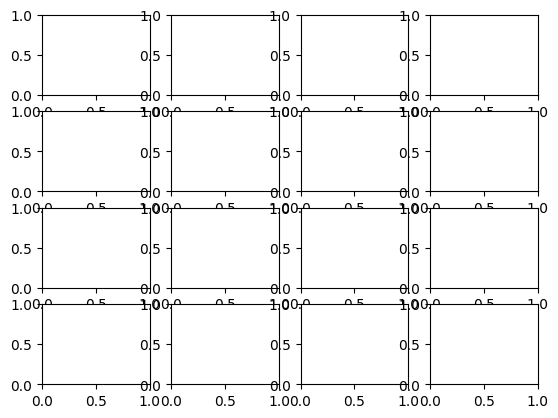

In [119]:
length = data.axes[1].size
print(length)
axSize = int(np.ceil(np.sqrt(length)))
fig, axes = plt.subplots(axSize, axSize)

print(f'{length} variables x {data.shape[0]} lines')
